In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model


In [13]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

11493376/11490434 [==============================] - 0s 0us/step


In [14]:
base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
for layer in base_model.layers:
  layer.trainable = False


234700800/234698864 [==============================] - 4s 0us/step


In [15]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)

In [16]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [17]:
history = head_model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 40s 35ms/step - loss: 1.1879 - accuracy: 0.6069 - val_loss: 0.4991 - val_accuracy: 0.8615
Epoch 2/40
907/907 [==============================] - 29s 32ms/step - loss: 0.6139 - accuracy: 0.8014 - val_loss: 0.4513 - val_accuracy: 0.8690
Epoch 3/40
907/907 [==============================] - 29s 32ms/step - loss: 0.5196 - accuracy: 0.8306 - val_loss: 0.3575 - val_accuracy: 0.8945
Epoch 4/40
907/907 [==============================] - 29s 32ms/step - loss: 0.4637 - accuracy: 0.8487 - val_loss: 0.3259 - val_accuracy: 0.9070
Epoch 5/40
907/907 [==============================] - 29s 32ms/step - loss: 0.4240 - accuracy: 0.8604 - val_loss: 0.2627 - val_accuracy: 0.9310
Epoch 6/40
907/907 [==============================] - 29s 32ms/step - loss: 0.4069 - accuracy: 0.8666 - val_loss: 0.2640 - val_accuracy: 0.9215
Epoch 7/40
907/907 [==============================] - 29s 32ms/step - loss: 0.3832 - accuracy: 0.8716 - val_loss: 0.2602 - val_accuracy:

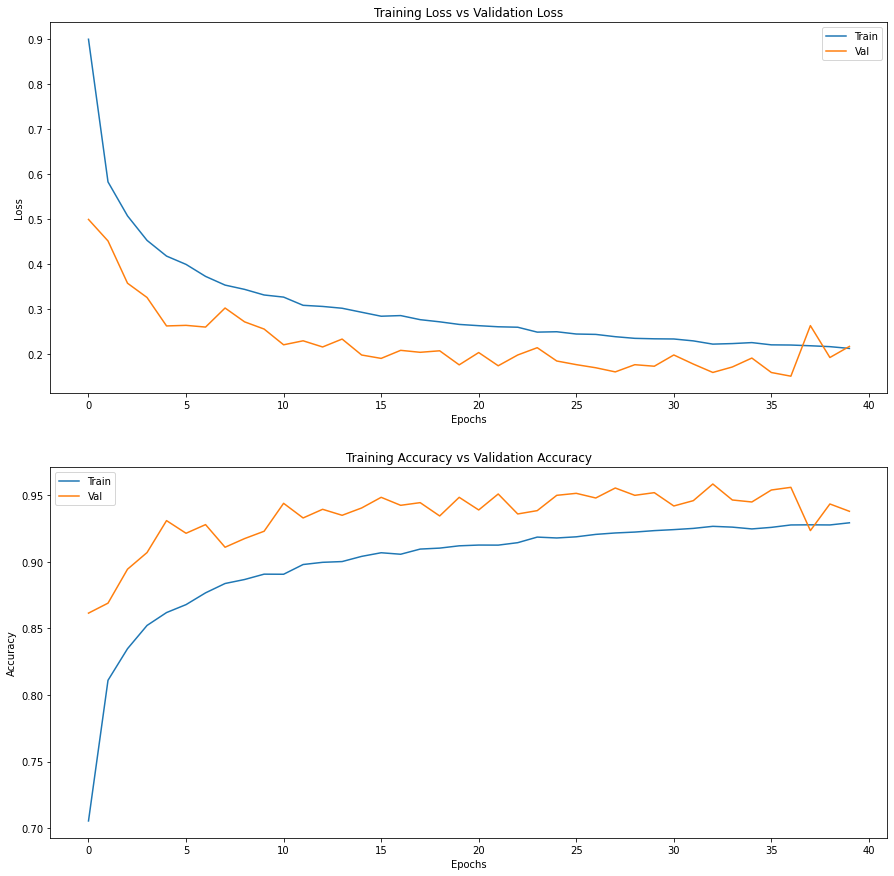

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [20]:
head_model.evaluate(x_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 0.2796 - accuracy: 0.9099


[0.27956628799438477, 0.9099000096321106]